In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [ ]:
pd.set_option('display.max_columns', None)

In [4]:
data_path = os.path.join("..", "data", "bikes.csv")
df = pd.read_csv(data_path)

In [5]:
print("\nInitial Data Preview:")
print(df.head())


Initial Data Preview:
                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  


In [6]:
df.shape

(7857, 8)

In [7]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [10]:
# Clean mileage column (extract numeric part)
df['mileage']=df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [11]:
# Cleaning power column (extract numeric part)
df['power']=df['power'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [12]:
#Extracting engine cc from model_name
cc_extracted = df['model_name'].str.extract(r"(\d{2,4})cc")
df['cc'] = cc_extracted[0].astype(float)

In [13]:
# Extracting brand from model_name
df['brand']=df['model_name'].apply(lambda x: str(x).split()[0])

In [14]:
df.dropna(subset=['mileage', 'power', 'cc'], inplace=True)

Exploratory Data Analysis (EDA)

In [15]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        model_year     mileage        power         price           cc
count  5210.000000  5210.00000  5210.000000  5.210000e+03  5210.000000
mean   2014.561036    46.74963    18.041109  8.225050e+04   238.719194
std       4.105002    17.25998    10.043944  8.299329e+04   135.684706
min    1950.000000     5.00000     6.100000  0.000000e+00   100.000000
25%    2013.000000    35.00000    13.000000  3.500000e+04   150.000000
50%    2015.000000    40.00000    17.000000  6.300000e+04   180.000000
75%    2017.000000    60.00000    19.800000  1.148500e+05   350.000000
max    2021.000000   104.00000   197.000000  1.900000e+06  1800.000000


In [16]:
df.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'cc', 'brand'],
      dtype='object')

In [17]:
output_dir = os.path.join("..", "outputs", "graphs")
if os.path.isfile(output_dir):
    os.remove(output_dir)
os.makedirs(output_dir, exist_ok=True)

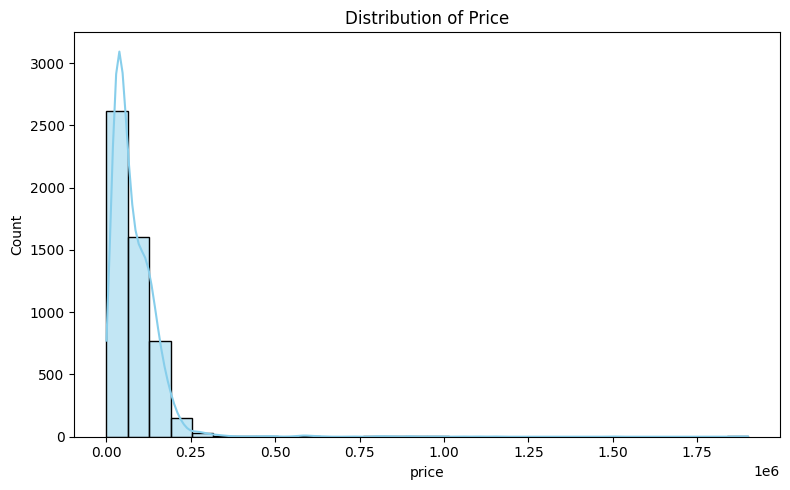

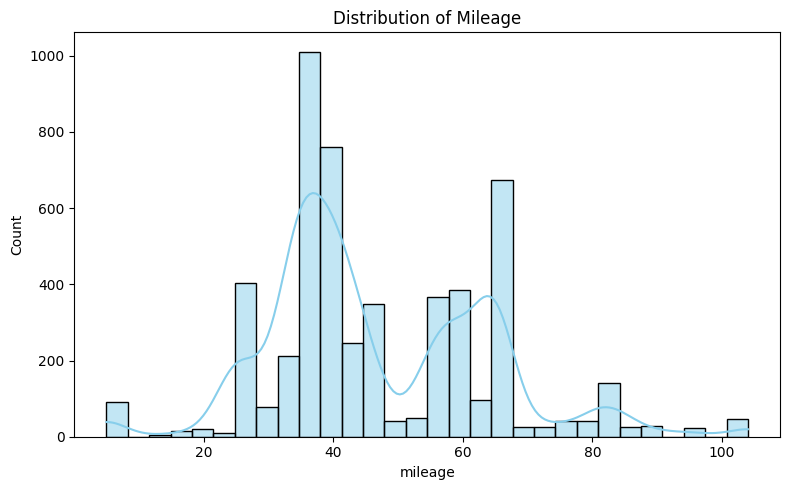

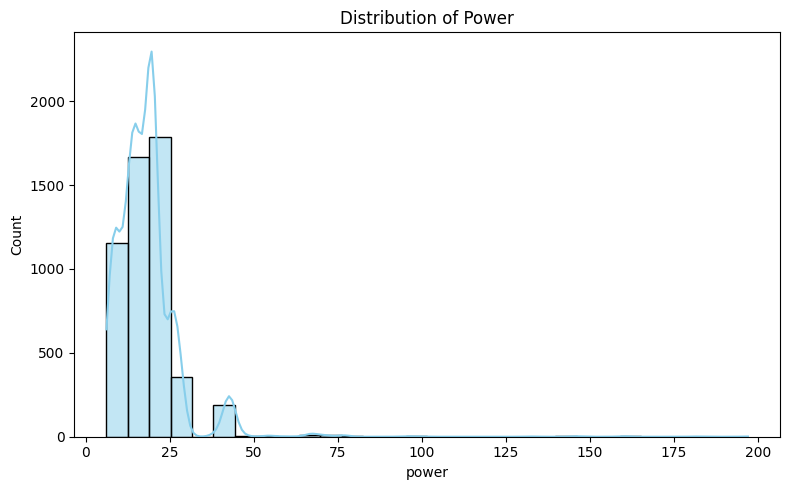

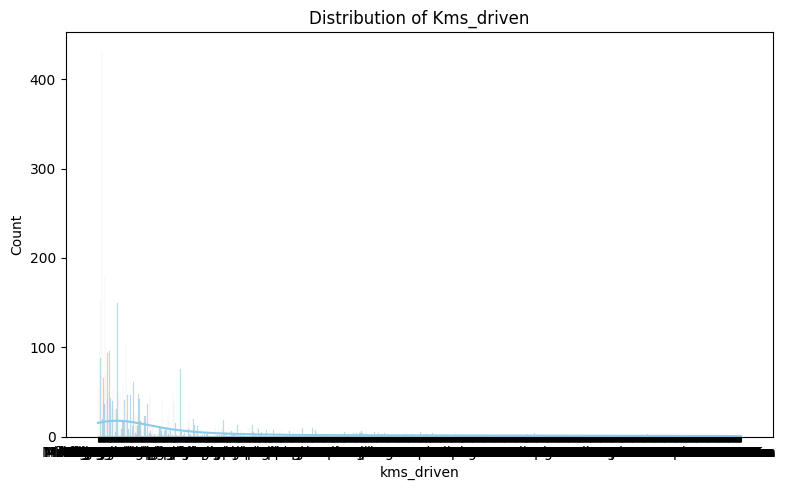

In [18]:
# Plot histograms for numerical variables
for col in ['price', 'mileage', 'power', 'kms_driven']:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution of {col.capitalize()}")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"dist_{col}.png"))
        plt.show()

C:\Users\Nanda Chowgle\AppData\Local\Temp\ipykernel_19644\3731459376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, order=df[cat_col].value_counts().index, palette='viridis')


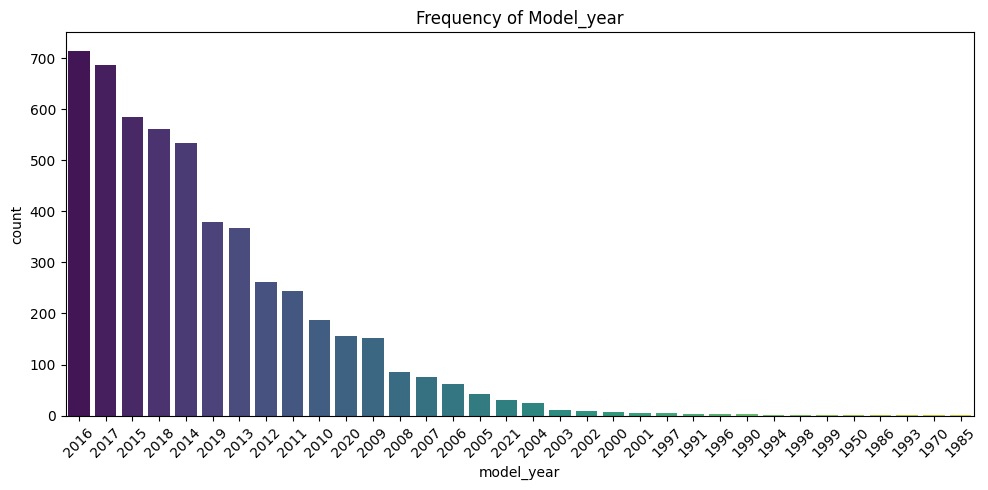

C:\Users\Nanda Chowgle\AppData\Local\Temp\ipykernel_19644\3731459376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, order=df[cat_col].value_counts().index, palette='viridis')


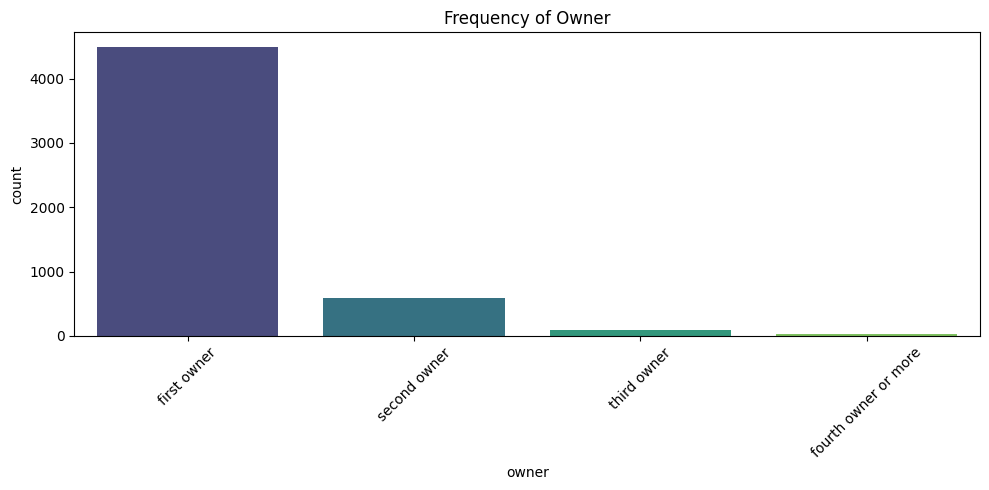

C:\Users\Nanda Chowgle\AppData\Local\Temp\ipykernel_19644\3731459376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, order=df[cat_col].value_counts().index, palette='viridis')


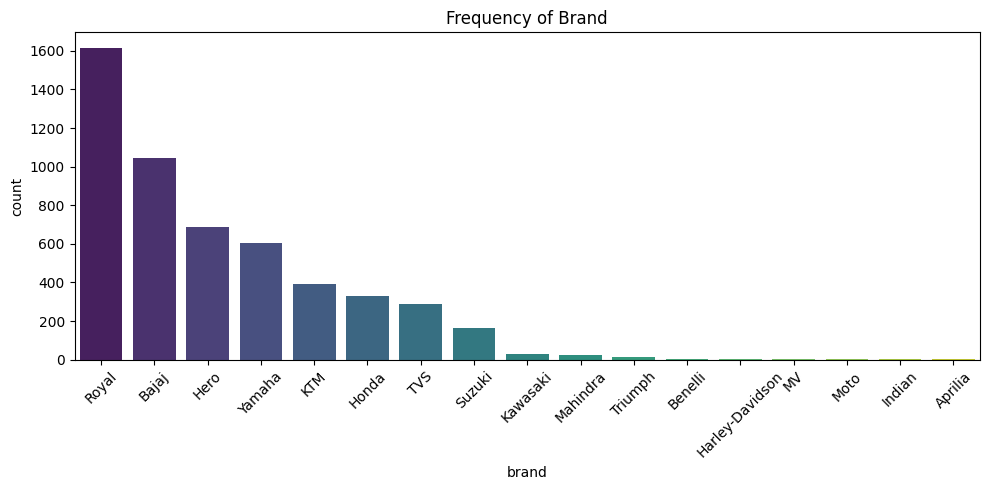

In [19]:
# Countplots for categorical variables
for cat_col in ['model_year', 'owner', 'brand']:
    if cat_col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=cat_col, order=df[cat_col].value_counts().index, palette='viridis')
        plt.title(f"Frequency of {cat_col.capitalize()}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"count_{cat_col}.png"))
        plt.show()

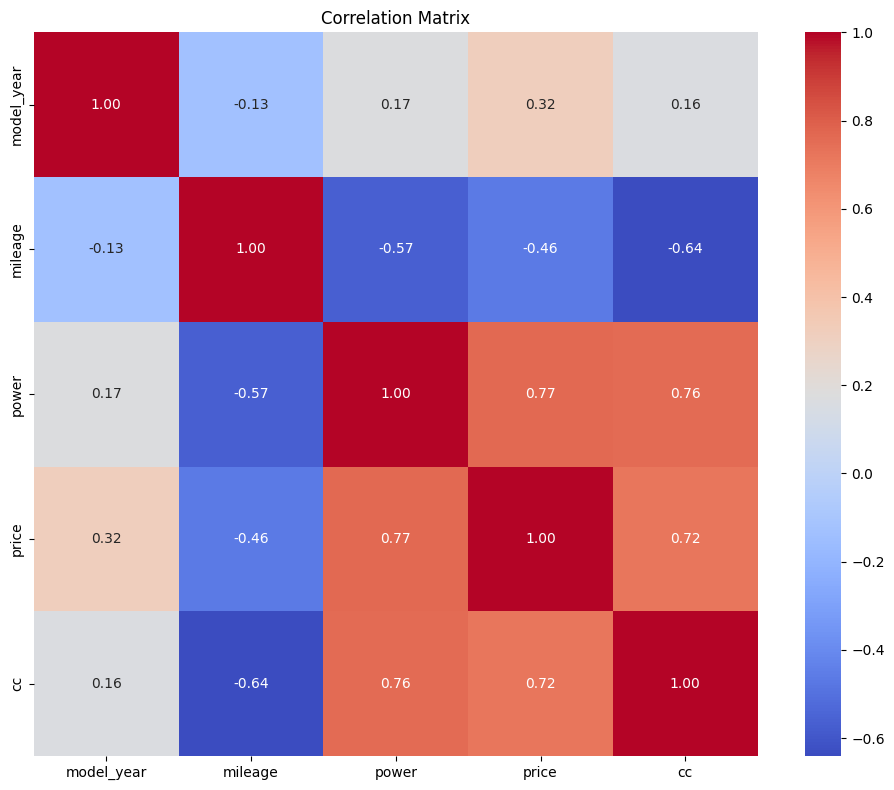

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.show()

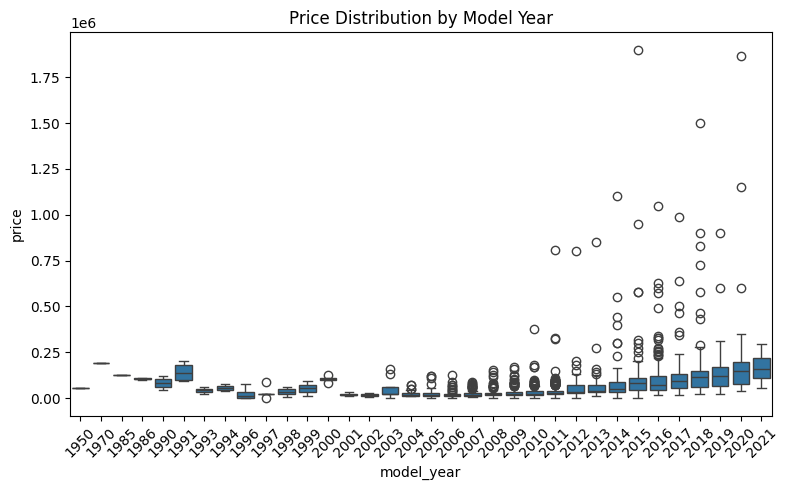

In [21]:
# Price vs Model Year
if 'model_year' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='model_year', y='price', data=df)
    plt.title("Price Distribution by Model Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "price_vs_model_year.png"))
    plt.show()

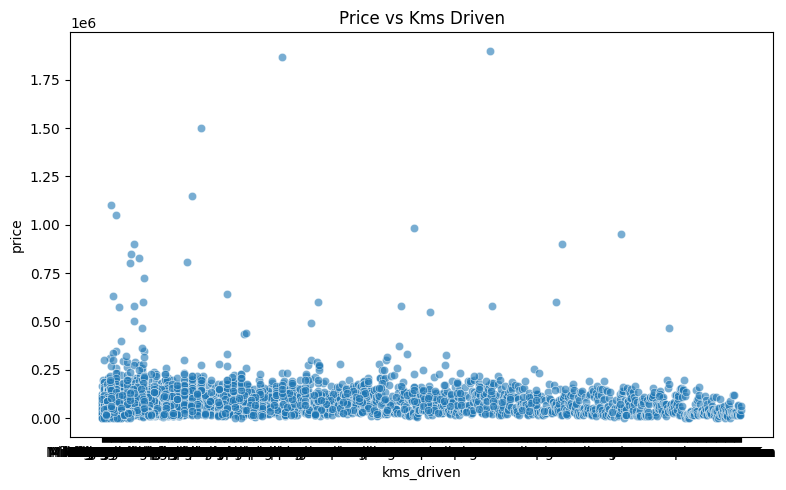

In [22]:
# Price vs Kms Driven
if 'kms_driven' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='kms_driven', y='price', data=df, alpha=0.6)
    plt.title("Price vs Kms Driven")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "price_vs_kms_driven.png"))
    plt.show()

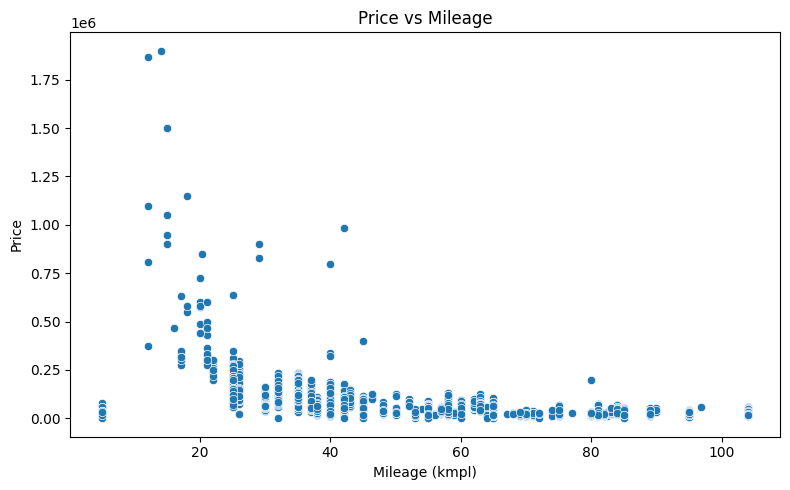

In [23]:
#Price vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Price vs Mileage")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "price_vs_mileage.png"))
plt.show()

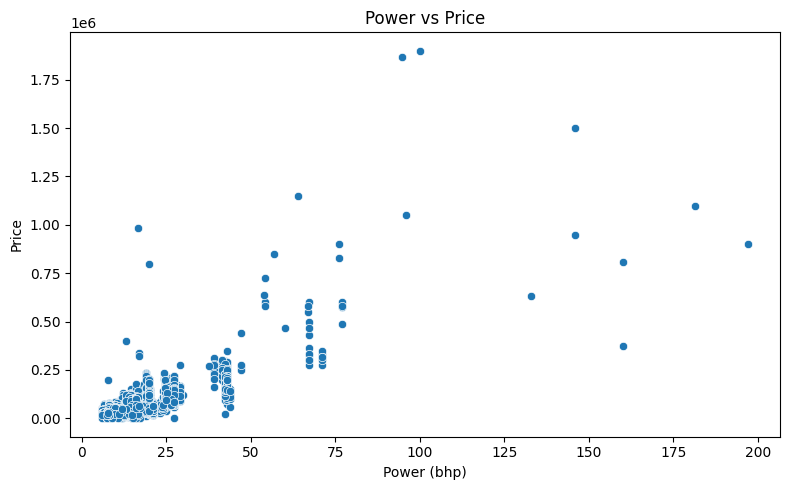

In [24]:
#Power vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='power', y='price', data=df)
plt.title("Power vs Price")
plt.xlabel("Power (bhp)")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "power_vs_price.png"))
plt.show()

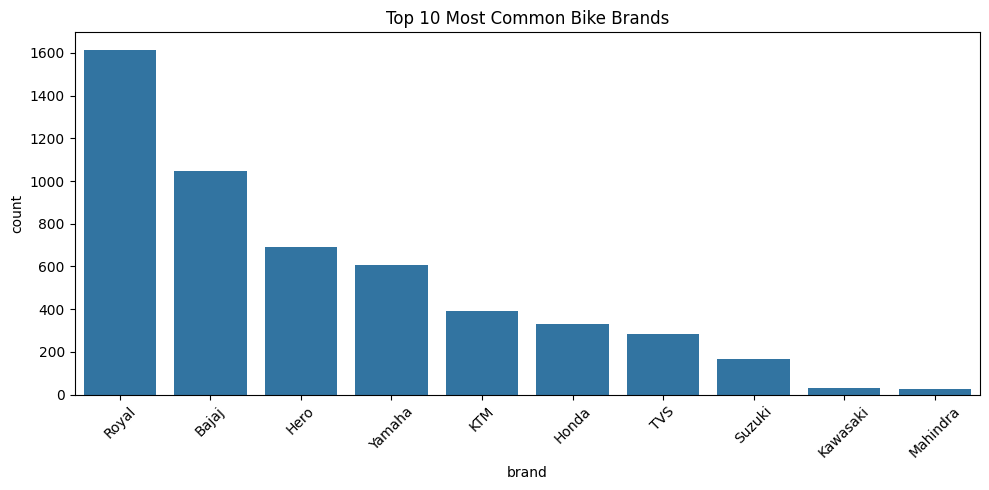

In [25]:
# Countplot of top 10 brands
plt.figure(figsize=(10, 5))
top_brands = df['brand'].value_counts().nlargest(10)
sns.countplot(data=df[df['brand'].isin(top_brands.index)], x='brand', order=top_brands.index)
plt.title("Top 10 Most Common Bike Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_brands.png"))
plt.show()

In [26]:
# Save cleaned data to use for modeling
cleaned_path = os.path.join("..", "data", "bikes_cleaned.csv")
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_path}")


Cleaned dataset saved to: ..\data\bikes_cleaned.csv
